# Vehicle Detection Project 5

In [1]:
# Code from lessons
# Reads filenames of images in and splits them to cars and non-cars

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

# images are divided up into vehicles and non-vehicles

images = glob.glob('data/*/*/*.png')
cars = []
notcars = []

for image in images:
    # replace backslashes for windows
    image = image.replace('\\','/')
    if 'non-vehicles' in image:
        notcars.append(image)
    else:
        cars.append(image)
                


In [2]:
# A1
# code from lessons
# bin_spatial, color_hist, get_hog_features, extract_features
# functions to extract the features from the dataset

import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec, block_norm='L2-Hys')
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec, block_norm='L2-Hys')
        return features


In [3]:
# A2
# Code from lessons

# Define a function to extract features from a single image
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):  
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)




# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        # scale to 255 and change data type since we are using mpimg
        image = mpimg.imread(file)
        image *= 255
        image = image.astype(np.uint8)
        file_features = single_img_features(image, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)

        

        features.append(file_features)

    # Return list of feature vectors
    return features
    


In [4]:
# A2
# Parameters


params = { 'color_space'         : 'YCrCb',
           'orient'              : 9,
           'pix_per_cell'        : 8,
           'cell_per_block'      : 2,
           'hog_channel'         : 'ALL',
           'spatial_size'        : (16,16),
           'hist_bins'           : 16,
           'spatial_feat'        : True,
           'hist_feat'           : True,
           'hog_feat'            : True }



In [5]:
# A3
# Extract features here
# Sets up train and test data for the SVM

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

global params

car_features = extract_features(cars, color_space=params['color_space'], 
                        spatial_size=params['spatial_size'], hist_bins=params['hist_bins'], 
                        orient=params['orient'], pix_per_cell=params['pix_per_cell'], 
                        cell_per_block=params['cell_per_block'], 
                        hog_channel=params['hog_channel'], spatial_feat=params['spatial_feat'], 
                        hist_feat=params['hist_feat'], hog_feat=params['hog_feat'])
notcar_features = extract_features(notcars, color_space=params['color_space'], 
                        spatial_size=params['spatial_size'], hist_bins=params['hist_bins'], 
                        orient=params['orient'], pix_per_cell=params['pix_per_cell'], 
                        cell_per_block=params['cell_per_block'], 
                        hog_channel=params['hog_channel'], spatial_feat=params['spatial_feat'], 
                        hist_feat=params['hist_feat'], hog_feat=params['hog_feat'])

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print("Finished setting up features and labels")


Finished setting up features and labels


In [6]:
# A4
# Train and test the classifier

import time

# Use a linear SVC 
svc = LinearSVC(C = 10)
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
print('Classifier Trained')

4.01 Seconds to train SVC...
Test Accuracy of SVC =  0.9832
Classifier Trained


In [7]:
# A5
# Code from lessons
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop = (0, x_start_stop[1])
    if x_start_stop[1] == None:
        x_start_stop = (x_start_stop[0], img.shape[1])
    if y_start_stop[0] == None:
        y_start_stop = (0, y_start_stop[1])
    if y_start_stop[1] == None:
        y_start_stop = (y_start_stop[0], img.shape[0])

    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

# Get a list of windows to search of various scales

y_start_stop = [400, None] # Min and max in y to search in slide_window()
window_size_1 = (64,64)
window_size_2 = (80,80)
window_size_3 = (96,96) 
window_size_4 = (128,128)
window_size_5 = (160,160)

def get_window_list(image):
    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400,500], 
                        xy_window=window_size_1, xy_overlap=(0.75, 0.75))
    windows += slide_window(image, x_start_stop=[None, None],y_start_stop=[400,540],
                                xy_window=window_size_2, xy_overlap=(0.75, 0.75))
    windows += slide_window(image, x_start_stop=[None, None], y_start_stop=[400,580], 
                        xy_window=window_size_3, xy_overlap=(0.75, 0.75))
    windows += slide_window(image, x_start_stop=[None, None],y_start_stop=[400,675],
                                xy_window=window_size_4, xy_overlap=(0.75, 0.75))
    #windows += slide_window(image, x_start_stop=[None, None],y_start_stop=[400,None],
    #                            xy_window=window_size_4, xy_overlap=(0.5, 0.5))
    
    return windows


In [8]:
# A6
# Code from lesson
# single_img_features, search_windows
# data must be pre-loaded

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
    


In [9]:
# A7
# Code from lesson
# multiple detections and false positives

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap



def find_labeled_boxes(labels):
    label_box_list = []
    # Iterate through detections
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        label_box_list.append(bbox)
        
    return label_box_list


def draw_labeled_boxes(img, box_list):
    for box in box_list:
        cv2.rectangle(img, box[0], box[1], (0,0,225), 6)
        
    return img



In [10]:
# A8
# functions to filter out false positives and smooth detection boxes

def match_boxes(new_box, test_box):
    error_dist = 15.0  # new center must be this close to an old center to qualify
    error_size = 0.5 # old size must +/- less than this size
    
    # compute size of each box
    new_size = (new_box[1][0] - new_box[0][0]) * (new_box[1][1] - new_box[0][1])
    test_size = (test_box[1][0] - test_box[0][0]) * (test_box[1][1] - test_box[0][1])
    # test to see if the size is within margin of error
    if new_size/test_size > (1-error_size) and new_size/test_size < (1+error_size):
        #test the distance
        new_center = ( (new_box[1][0]-new_box[0][0])/2 + new_box[0][0], (new_box[1][1]-new_box[0][1])/2 + new_box[0][1] )
        test_center = ( (test_box[1][0]-test_box[0][0])/2 + test_box[0][0], (test_box[1][1]-test_box[0][1])/2 + test_box[0][1] )
        
        dist = ( (new_center[1] - test_center[1])**2 + (new_center[0]- test_center[0])**2 )**0.5
        if dist < error_dist:
            return new_box
        
    return None




def compare_matches(new_boxes, possible_boxes):
    gd_matches = []

    for box in new_boxes:
        for pbox in possible_boxes:
            mb = match_boxes(box, pbox)
            if mb:
                gd_matches.append(mb)
                continue
                
    return gd_matches




In [11]:
# A9
# global to keep track of previous detections

import collections

framenum = 0
draw_box_list = []
possible_matches = []
good_matches = []


In [12]:
# A10
# Pipeline function to process video images one at a time
# Data and SVM model must be trained in previous cells
# Code from lessons with some modifications


def process_video_image(image):
    global params
    global framenum
    global draw_box_list
    global possible_matches
    global good_matches
    

    # get the scaled windows to search
    windows = get_window_list(image)

    # find windows with cars in them
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=params['color_space'], 
                    spatial_size=params['spatial_size'], hist_bins=params['hist_bins'], 
                    hist_range=(0, 256), orient=params['orient'], 
                    pix_per_cell=params['pix_per_cell'], cell_per_block=params['cell_per_block'], 
                    hog_channel=params['hog_channel'], spatial_feat=params['spatial_feat'],
                    hist_feat=params['hist_feat'], hog_feat=params['hog_feat'])

    
    # filtering and smoothing
    cur_heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # add heat to current image
    cur_heat = add_heat(cur_heat, hot_windows)
    
    # threshold heat
    cur_heat = apply_threshold(cur_heat, 7)
    
    # visualize
    heatmap = np.clip(cur_heat, 0, 255)        
    
    # find final boxes
    labels = label(heatmap)

    # find the new box list
    new_box_list = find_labeled_boxes(labels)
    
    # compare to possible matches (old)
    good_matches = compare_matches(new_box_list, possible_matches)
    
    # update possibles to include new ones
    possible_matches = new_box_list
    
    # update every n frames
    if framenum%6 == 0:
        draw_box_list = good_matches
    
    # draw them
    draw_img = draw_labeled_boxes(np.copy(image), draw_box_list)

    

    framenum += 1
    
    return draw_img




In [14]:
# A11
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# clear the global containing previous detections
framenum = 0
#all_maps.clear()
#old_box_list = []
draw_box_list = []
possible_matches = []
good_matches = []

project_video_fname = 'project_video.mp4'
#white_output = 'project_video_output.mp4'
test_video_fname = 'test_video.mp4'
white_output = 'test_video_output.mp4'


clip1 = VideoFileClip(test_video_fname)
#clip1 = VideoFileClip(project_video_fname).subclip(25,27)
#clip1 = VideoFileClip(test_video_fname)
#clip1 = VideoFileClip(test_video_fname).subclip(0,0.5)
white_clip = clip1.fl_image(process_video_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)


[MoviePy] >>>> Building video test_video_output.mp4
[MoviePy] Writing video test_video_output.mp4


 97%|████████████████████████████████████████▉ | 38/39 [03:50<00:06,  6.06s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output.mp4 

Wall time: 3min 51s


In [18]:
# A12
# Writing individual frames to disk

vidcap = cv2.VideoCapture(white_output)
success,image = vidcap.read()
count = 0
success = True
while success:
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  cv2.imwrite('video_frames_output/frame%d.jpg' % count, image)     # save frame as JPEG file
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

## Visualizations

Your function returned a count of 8792  cars and 9018  non-cars
of size:  (64, 64, 3)  and data type: float32
1.0
0.552941


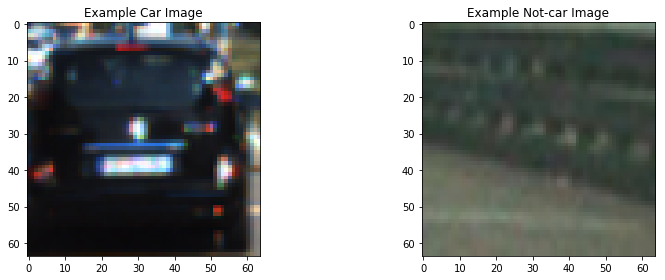

In [18]:
# V1
# Data visualization
# Code from lesson
# Displays a random item
# Define a function to return some characteristics of the dataset 

def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    image = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = image.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = image.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])
print(car_image.max())
print(notcar_image.max())

# Plot the examples
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')
fig.tight_layout()
plt.show()

fig.savefig('output_images/car_notcar.jpg')


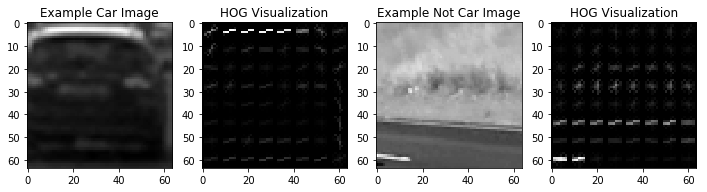

In [47]:
# V2
# HOG visualization

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog


# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image_car = mpimg.imread(cars[ind])
image_car *= 255
image_car = image_car.astype(np.uint8)
ind2 = np.random.randint(0, len(notcars))
image_notcar = mpimg.imread(notcars[ind2])
image_notcar *= 255
image_notcar = image_notcar.astype(np.uint8)

gray_car = cv2.cvtColor(image_car, cv2.COLOR_RGB2GRAY)
gray_notcar = cv2.cvtColor(image_notcar, cv2.COLOR_RGB2GRAY)

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Call our function with vis=True to see an image output
_, hog_image = get_hog_features(gray_car, orient, 
                        pix_per_cell, cell_per_block, vis=True, feature_vec=True)
_, hog_image2 = get_hog_features(gray_notcar, orient, 
                        pix_per_cell, cell_per_block, vis=True, feature_vec=True)


# Plot the examples
fig = plt.figure(figsize=(12,4))
plt.subplot(141)
plt.imshow(gray_car,cmap='gray')
plt.title('Example Car Image')
plt.subplot(142)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.subplot(143)
plt.imshow(gray_notcar, cmap='gray')
plt.title('Example Not Car Image')
plt.subplot(144)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG Visualization')

plt.show()

fig.savefig('output_images/car_notcar_hogs.jpg')


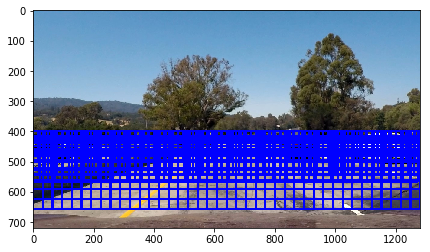

In [51]:
# V3
# Visualization
# Example of scaled windows

sample_fname = 'test_images/test1.jpg'
im2 = mpimg.imread(sample_fname)

wins = get_window_list(im2)
im2 = draw_boxes(im2, wins)

# Plot
fig = plt.figure(figsize=(12,4))
plt.imshow(im2)
plt.show()

fig.savefig('output_images/scaled_windows.jpg')


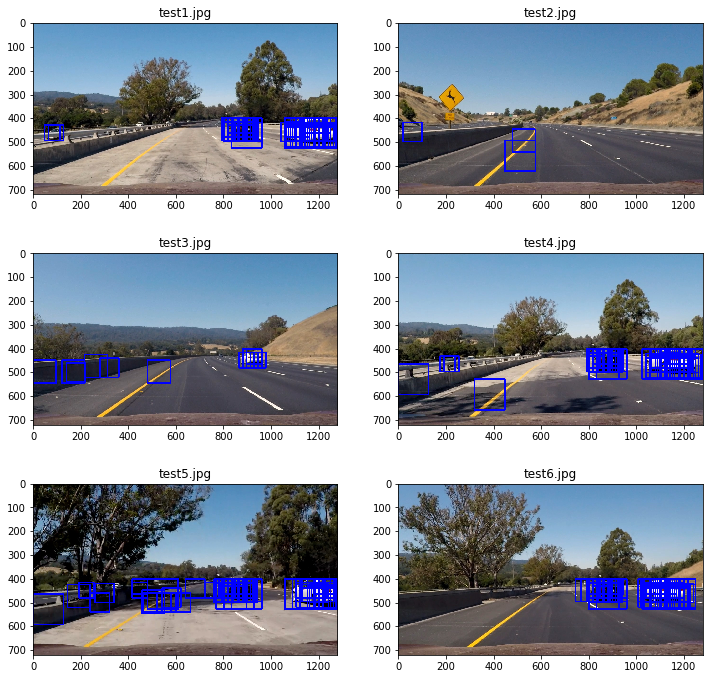

In [56]:
# V4
# Visualization
# Search for hot windows in sample images
# Assumes data pre-loaded and trained model


fig = plt.figure(figsize=(12,12))

for index in range(6):
    sample_fname = 'test_images/test' + str(index+1) + '.jpg'
    image = mpimg.imread(sample_fname)
    draw_image = np.copy(image)

    windows = get_window_list(image)

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=params['color_space'], 
                            spatial_size=params['spatial_size'], hist_bins=params['hist_bins'], 
                            orient=params['orient'], pix_per_cell=params['pix_per_cell'], 
                            cell_per_block=params['cell_per_block'], 
                            hog_channel=params['hog_channel'], spatial_feat=params['spatial_feat'], 
                            hist_feat=params['hist_feat'], hog_feat=params['hog_feat'])   

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

    plt.subplot(3,2,index+1)
    plt.imshow(window_img)
    plt.title(sample_fname.replace('test_images/',''))
    
plt.show()

fig.savefig('output_images/hot_windows.jpg')


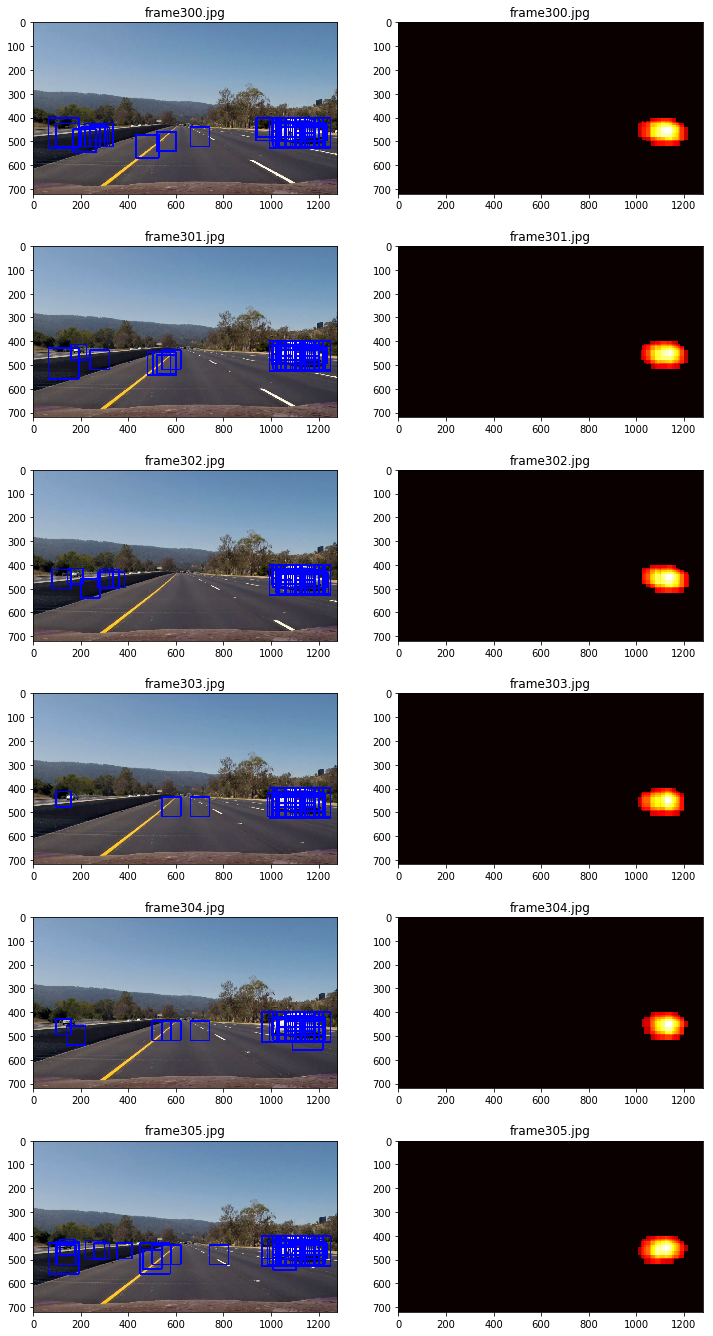

In [58]:
# V5
# Code from lesson
# Heatmap visualization of multiple detections and false positives

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

fig = plt.figure(figsize=(12,24))

for index in range(6):
    sample_fname = 'video_frames/frame' + str(index+300) + '.jpg'
    image = mpimg.imread(sample_fname)
    draw_image = np.copy(image)

    windows = get_window_list(image)

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=params['color_space'], 
                            spatial_size=params['spatial_size'], hist_bins=params['hist_bins'], 
                            orient=params['orient'], pix_per_cell=params['pix_per_cell'], 
                            cell_per_block=params['cell_per_block'], 
                            hog_channel=params['hog_channel'], spatial_feat=params['spatial_feat'], 
                            hist_feat=params['hist_feat'], hog_feat=params['hog_feat'])   

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6) 
    

    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,hot_windows)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,7)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    
    #draw_img = draw_labeled_bboxes(np.copy(image), labels)

    #plt.imsave('heatmap.jpg', heatmap, cmap='hot')

    plt.subplot(6,2,index*2+1)
    plt.imshow(window_img)
    plt.title(sample_fname.replace('video_frames/',''))
    plt.subplot(6,2,index*2+2)
    plt.imshow(heatmap, cmap='hot')
    plt.title(sample_fname.replace('video_frames/',''))
    
plt.show()

fig.savefig('output_images/heatmaps.jpg')




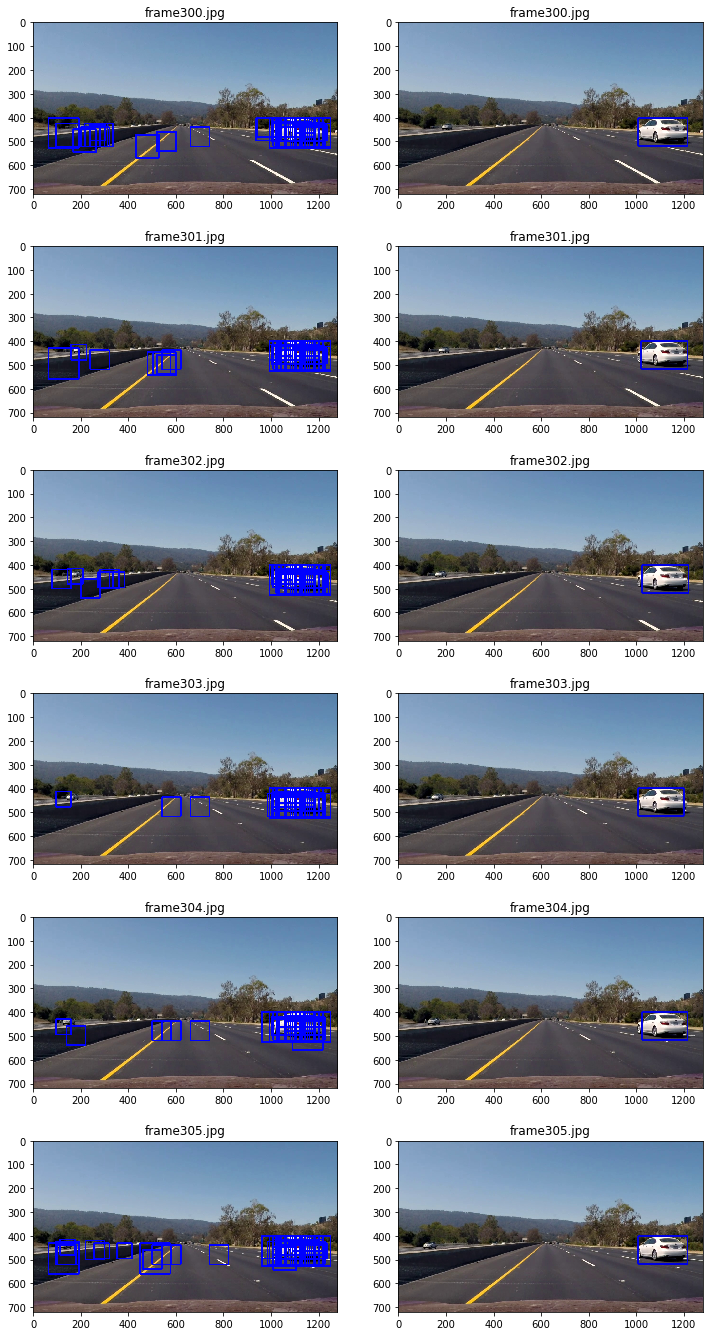

In [60]:
# V6
# Code from lesson
# Labeled heatmaps

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

fig = plt.figure(figsize=(12,24))

for index in range(6):
    sample_fname = 'video_frames/frame' + str(index+300) + '.jpg'
    image = mpimg.imread(sample_fname)
    draw_image = np.copy(image)

    windows = get_window_list(image)

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=params['color_space'], 
                            spatial_size=params['spatial_size'], hist_bins=params['hist_bins'], 
                            orient=params['orient'], pix_per_cell=params['pix_per_cell'], 
                            cell_per_block=params['cell_per_block'], 
                            hog_channel=params['hog_channel'], spatial_feat=params['spatial_feat'], 
                            hist_feat=params['hist_feat'], hog_feat=params['hog_feat'])   

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6) 
    

    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,hot_windows)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,7)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    
    # find the new box list
    new_box_list = find_labeled_boxes(labels)
    
    
    # draw them
    draw_img = draw_labeled_boxes(np.copy(image), new_box_list)


    plt.subplot(6,2,index*2+1)
    plt.imshow(window_img)
    plt.title(sample_fname.replace('video_frames/',''))
    plt.subplot(6,2,index*2+2)
    plt.imshow(draw_img, cmap='hot')
    plt.title(sample_fname.replace('video_frames/',''))
    
plt.show()




fig.savefig('output_images/labeled_heatmaps.jpg')




In [13]:
# Zero out globals here to process single frames in next box

framenum = 0
draw_box_list = []
possible_matches = []
good_matches = []



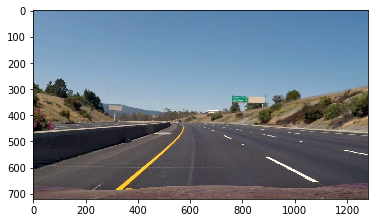

Frame  3
Draw list:  []
Poss list:  [((16, 416), (79, 479))]
Good list:  []


In [16]:
# Debug on individual frames


im1 = mpimg.imread('video_frames/frame2.jpg')
#im1 = mpimg.imread('test_frames/frame0.jpg')
#im1 = mpimg.imread('test_images/test1.jpg')


result = process_video_image(im1)

plt.imshow(result)
plt.show()

print('Frame ', framenum)
print('Draw list: ', draw_box_list)
print('Poss list: ', possible_matches)
print('Good list: ', good_matches)

### HOG Sub-sampling

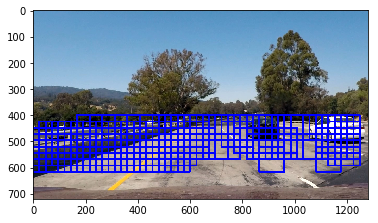

In [38]:
# B1
# Code from lesson
# HOG sub-sampling

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2


orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

img = mpimg.imread('test_images/test1.jpg')
#img = mpimg.imread('examples/windows_test.png')

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img
    
ystart = 400
ystop = 656
scale = 1.5
    
out_img = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

plt.imshow(out_img)
plt.show()

In [9]:
# Read extra data from udacity

import csv

fnames = []
rects = []
occluded = []
str_labels = []

with open('data/object-dataset/labels.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=' ')
    for row in filereader:
        fnames.append(row[0])
        rects.append( ( (int(row[1]),int(row[2])), (int(row[3]),int(row[4]))) )
        occluded.append(row[5])
        str_labels.append(row[6])
        
print(fnames[0], rects[0], occluded[0], str_labels[0])




1478019952686311006.jpg ((950, 574), (1004, 620)) 0 car
